In [1]:
#Import all necessary dependancies
from asyncio import constants
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cvxpy'

In [12]:
!pip3 install ipython==8.3.0

  Using cached ipython-8.3.0-py3-none-any.whl (750 kB)


In [2]:
#instanciate 
a = [0.5, -0.5, 0.2, -0.7, 0.6, -0.2, 0.7, -0.5, 0.5, -0.5]
l = [40, 20, 40, 40, 20, 40, 30, 40, 30, 60]

In [3]:
Preq = np.arange(a[0], a[0]*(l[0]+0.5), a[0])

print(Preq.shape)

for i in range(1, len(l)):
    
    #Preq = np.r_[Preq, np.arange(Preq[-1]+a[i])]

    #print(Preq)
    pass

T = sum(l)

Et = cp.Variable(40)
Pbr = cp.Variable(40)
Pmg = cp.Variable(40)
Peng = cp.Variable(40)
Et1 = cp.Variable(40)

(40,)


In [42]:
# Define the limits of the problem
Peng_max = 20.0
Pmg_min = -6.0
Pmg_max = 6.0
Ebatt_max = 100
eta = 0.1
epsilon = 0.01
gamma = 0.1


#define the constraints on the model

constraints = [
    0 <= Pbr, Pbr >= 0,
    0 <= Peng, Peng <= Peng_max,
    Pmg_min <= Pmg, Pmg <= Pmg_max,
    0 <= Et, Et <= Ebatt_max,
    Et1 == Et - Pmg - (eta * Pmg),
    Preq == Peng + Pmg - Pbr
]

In [5]:
# The cost function is a quadratic expression
cost = (Peng * gamma) + (gamma * Peng ** 2) 

#the objective is to mimimize the cost function
# However the values are matrices, so as to convert them into scalars I used the convex function (max). 
objective = cp.Minimize(cp.max(cost))

#define the problem
problem = cp.Problem(objective, constraints)

#solve the problem
problem.solve()

21.00000002570824

In [12]:
# The lowest fuel consumption is
print(Peng.value[0])

# The energy in the battery 
print(Et.value[0])

# The motor generator power 
print(Pmg.value[0])

# The braking power
print(Pbr.value[0])

6.0578160797506655
49.99142554763185
2.2113743818492493
7.769190461599914


# Build Plots to showcase the phenomenon better

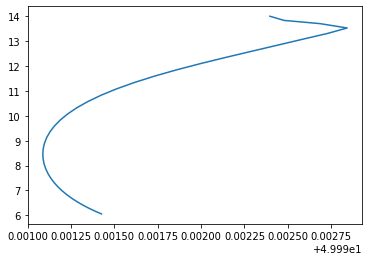

In [13]:
#plot th energy in battery vs Power of combustion engine
plt.plot(Et.value, Peng.value)

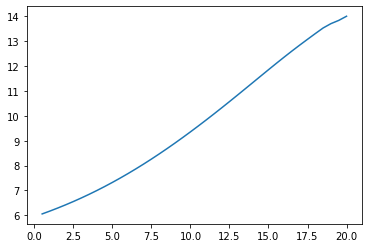

In [8]:
# Required power to perform task vs power produced by the combustion engine
plt.plot(Preq, Peng.value)

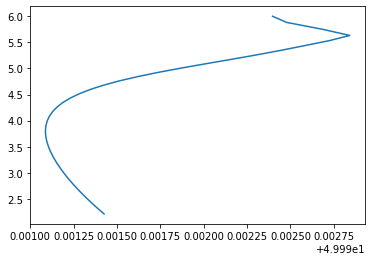

In [9]:
#Energy in battery compared to power produced by motor
plt.plot(Et.value, Pmg.value)

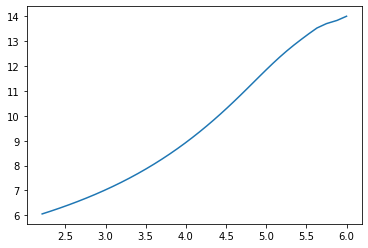

In [10]:
plt.plot(Pmg.value, Peng.value)

In [14]:
print(Peng.value)

[ 6.05781608  6.17337166  6.29480458  6.42232342  6.55611991  6.69636459
  6.84320253  6.99674923  7.15708699  7.32426181  7.49828113  7.67911246
  7.86668312  8.06088101  8.26155648  8.46852517  8.68157146  8.90045225
  9.12490045  9.35462732  9.58932286  9.82865297 10.07225231 10.31971186
 10.57056069 10.82424199 11.08008414 11.33726808 11.59479284 11.85144503
 12.10579161 12.35624649 12.60131221 12.84013498 13.07340241 13.30365875
 13.5284104  13.70266489 13.83274062 14.        ]


#Postprocess


In [50]:
import math 

constraints = [
    0 <= Pbr, Pbr >= 0,
    0 <= Peng, Peng <= Peng_max,
    Pmg_min <= Pmg, Pmg <= Pmg_max,
    0 <= Et, Et <= Ebatt_max,
    Et1 == Et - Pmg - (eta * Pmg),
    Preq == Peng +  Pmg - Pbr
]

# The cost function is a quadratic expression
# Added the epsilon by max of the Pmg to the cost function
cost = (Peng * gamma) + (gamma * Peng ** 2) + (epsilon * cp.max(Pmg))

#the objective is to mimimize the cost function
# However the values are matrices, so as to convert them into scalars I used the convex function (max). 
objective = cp.Minimize(cp.max(cost))

#define the problem
problem = cp.Problem(objective, constraints)

#solve the problem
problem.solve()

21.059999981841948

In [51]:
# The lowest fuel consumption is
print(Peng.value[0])

# The energy in the battery 
print(Et.value[0])

# The motor generator power 
print(Pmg.value[0])

# The braking power
print(Pbr.value[0])

6.847090522877191
49.45298895424939
-0.1153286500211298
6.23176187285606


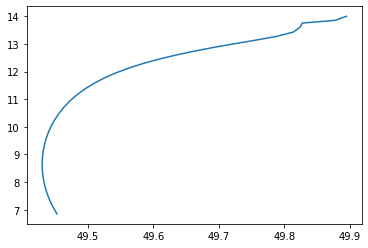

In [52]:
#plot th energy in battery vs Power of combustion engine
plt.plot(Et.value, Peng.value)